In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
import graphviz
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [5]:
df = pd.read_csv('..\data\shortCleanData.csv')

In [6]:
#df = Mdf.sample(frac=1, random_state=42)
#df = df.iloc[:len(df)//4]
print(df.shape)
df.info()

(24639, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24639 entries, 0 to 24638
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   1-Abschluss                             24639 non-null  object
 1   1-Abschluss in DE                       24639 non-null  object
 2   1-Deutscher Ehepartner                  24639 non-null  object
 3   1-EB/NE erfllt?                         24639 non-null  object
 4   1-Einreisejahr                          24639 non-null  object
 5   1-Antrag EB                             24639 non-null  object
 6   1-Antrag NE                             24639 non-null  object
 7   1-Integrationstest                      24639 non-null  object
 8   1-Jahr AR beantragt/bekommen            24639 non-null  object
 9   1-Jobcenter                             24639 non-null  object
 10  1-Kinder                                24639 non-null  in

In [ ]:
#df.drop(df.select_dtypes(include=['datetime64']).columns, axis=1, inplace=True)
#df.drop(["Grund_der_Absage","sales","Mailing_State","filered_sales.Other_State","filered_sales.Other_City","filered_sales.First_Visited_URL","filered_sales.sales","filered_sales.Mailing_State","filered_sales.id","id.1","Owner.1","Owner.2"], axis=1, inplace=True)
#df.info()

In [7]:
from pycaret.classification import *

In [8]:
import category_encoders as ce

In [9]:
encoder = ce.CatBoostEncoder()

In [10]:
#s = setup(df, target = 'SalesCount', ignore_features = ["Id","Zeitpunkt der Erstellung","Sales","Zeitpunkt der nderung","Zeitpunkt der Erstellung - Year","Zeitpunkt der nderung - Year"],max_encoding_ohe=50,normalize=True,normalize_method='robust')
#s = setup(df, target = 'SalesCount', ignore_features = ["Id","Zeitpunkt der Erstellung","Sales","Zeitpunkt der nderung","Zeitpunkt der Erstellung - Year","Zeitpunkt der nderung - Year"],max_encoding_ohe=5,encoding_method=encoder)

s = setup(df, target = 'SalesCount', ignore_features = ["Id","Zeitpunkt der Erstellung","Sales","Zeitpunkt der nderung","Zeitpunkt der Erstellung - Year","Zeitpunkt der nderung - Year"],max_encoding_ohe=1,normalize=True,normalize_method='minmax',encoding_method=encoder)

,Description,Value
0,Session id,8390
1,Target,SalesCount
2,Target type,Binary
3,Original data shape,"(24639, 26)"
4,Transformed data shape,"(24639, 20)"
5,Transformed train set shape,"(17247, 20)"
6,Transformed test set shape,"(7392, 20)"
7,Ignore features,6
8,Numeric features,1
9,Categorical features,18


In [11]:
test_Train = get_config("X_train_transformed")
test_Train

,1-Abschluss,1-Abschluss in DE,1-Deutscher Ehepartner,1-EB/NE erfllt?,1-Einreisejahr,1-Antrag EB,1-Antrag NE,1-Integrationstest,1-Jahr AR beantragt/bekommen,1-Jobcenter,1-Kinder,1-Netto,1-Rente,1-Sprachzertifikat,1-Test Sprache_Deutsch,1-Welches befristete AR haben Sie?,1-Wie ist ihr aktueller Familienstand?,1-Beratung?,1-Gltiger Nationalpass
8088,0.220448,0.526317,0.438450,0.361804,0.269945,0.107791,0.142680,0.272675,0.165171,0.334546,0.0,0.198719,0.311393,0.220999,0.0,0.109938,0.465088,1.0,0.448845
2520,0.220448,0.241229,0.199295,0.171381,0.269945,0.051650,0.142680,0.272675,0.165171,0.159308,0.0,0.198719,0.152158,0.220999,0.0,0.109938,0.214656,0.0,0.215072
17512,0.108220,0.526317,0.438450,0.107906,0.269945,0.032936,0.070720,0.272675,0.081084,0.100895,0.2,0.097783,0.099080,0.108850,0.0,0.053932,0.465088,1.0,0.137147
14515,0.070811,0.241229,0.438450,0.361804,0.269945,0.023579,0.070720,0.131636,0.165171,0.334546,0.3,0.198719,0.072541,0.071467,0.0,0.109938,0.214656,1.0,0.098185
13332,0.220448,0.146199,0.119577,0.171381,0.269945,0.017965,0.046733,0.084623,0.165171,0.159308,0.1,0.198719,0.311393,0.220999,0.0,0.109938,0.131179,1.0,0.074808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19060,0.212784,0.464832,0.487609,0.364242,0.321159,0.103989,0.161012,0.294681,0.190434,0.301782,0.1,0.063711,0.309512,0.276220,0.0,0.125891,0.443898,0.0,0.432209
12022,0.163171,0.496770,0.436124,0.364200,0.149161,0.103982,0.133847,0.232612,0.167786,0.301756,0.0,0.063659,0.221600,0.173133,0.0,0.101911,0.462547,1.0,0.432179
12434,0.212730,0.496712,0.436073,0.404560,0.321080,0.103974,0.133474,0.248536,0.167615,0.416343,0.2,0.220704,0.340164,0.173070,0.0,0.084568,0.462494,1.0,0.432150
18145,0.212587,0.464707,0.487508,0.364159,0.302986,0.103967,0.160987,0.294652,0.190401,0.301730,0.1,0.077853,0.309489,0.276180,0.0,0.125869,0.443831,1.0,0.432120


In [18]:
#best_model = compare_models(include=['nb'],sort='Recall')
best_model = compare_models(include=['lr'],sort='Recall',cross_validation=False,probability_threshold=0.09)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6441,0.7775,0.8425,0.1259,0.2191,0.1293,0.2288,0.2600


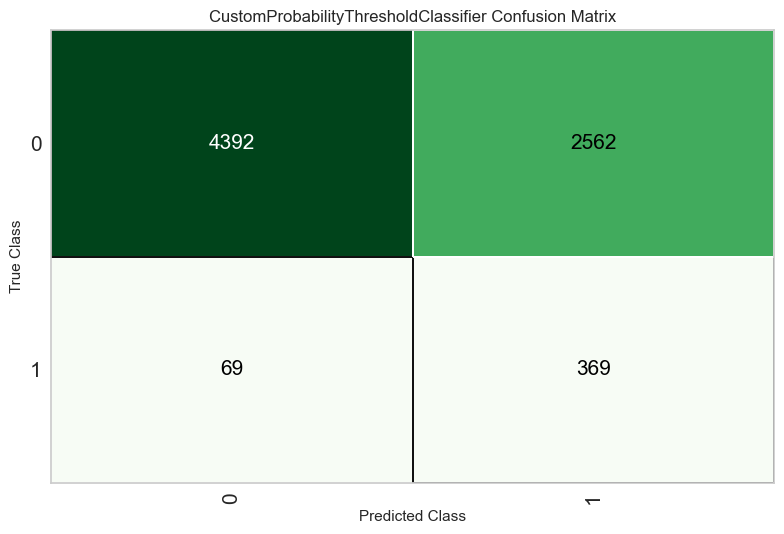

In [19]:
plot_model(best_model, plot = 'confusion_matrix')

In [ ]:
plot_model(best_model, plot = 'feature')

In [ ]:
# create copy of data
data_new = df.copy()
#data_new.drop('salesX', axis=1, inplace=True)
# generate labels using predict_model
finals=predict_model(best_model, data=data_new, raw_score=True)
finals.to_csv('shortSMOTE_LDA.csv', index=False)

In [ ]:
s2 = setup(df, target = 'Sales', ignore_features = ["Id"],fix_imbalance=True)

In [ ]:
best_model2 = compare_models(sort='Recall')

In [ ]:
plot_model(best_model2, plot = 'confusion_matrix')

In [ ]:
best_model3 = compare_models(include=['lda'],sort='Recall')

In [ ]:
plot_model(best_model3, plot = 'confusion_matrix')

In [ ]:
# create copy of data
#data_new = df.copy()
#data_new.drop('salesX', axis=1, inplace=True)
# generate labels using predict_model
finals=predict_model(best_model3, raw_score=True)
finals.to_csv('short_LDA.csv', index=False)

In [ ]:
best_model4 = compare_models(include=['gbc'],sort='Recall')

In [ ]:
plot_model(best_model4, plot = 'confusion_matrix')

In [ ]:
# # create a custom function
# def calculate_profit(y, y_pred):
#     tp = np.where((y_pred==1) & (y==1), (1500-15), 0)
#     fp = np.where((y_pred==1) & (y==0), -15, 0)
#     fn = np.where((y_pred==0) & (y==1), -1500, 0)
#     return np.sum([tp,fp,fn])
# # add metric to PyCaret
# add_metric('profit', 'Profit', calculate_profit)

def custom_metric(y,y_pred):
    tp = np.where((y_pred==1)&(y==1),1,0)
    fp = np.where((y_pred==1)&(y==0),-1,0)
    fn = np.where((y_pred==0)&(y==1),-0.5,0)
    return np.sum([tp,fp,np])

add_metric('customTest','CustomeTest',custom_metric)

In [ ]:
best_model5 = compare_models(probability_threshold=0.75,sort='Recall')

In [ ]:
plot_model(best_model5, plot = 'confusion_matrix')

In [ ]:
best_model6 = compare_models(include=['svm'],probability_threshold=0.75,sort='Recall')

In [ ]:
plot_model(best_model6, plot = 'confusion_matrix')

In [ ]:
plot_model(best_model, plot = 'confusion_matrix')